In [ ]:
#Crucial data processing and analysis libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV
from sklearn.datasets import data
import scipy as sp
import scipy.stats as stats
import plotly.express as px

#Loading data - NPRI_Data_for_review

df = pd.read_csv('NPRI Data for QC.xlsx - NPRI Data for reviewOilsandMLfinal3.csv')


#Setting up notebook so that all columns are displayed
pd.set_option('display.max_columns', 100)


# #1).Feature selection using p-values

In [ ]:
# loading data
from sklearn.model_selection import train_test_split

df =data = pd.read_csv('NPRI Data for QC.xlsx - NPRI Data for reviewOilsandMLfinal3.csv')
# Generate some data.
df.rename(columns={"CurrentYear": "Year_0"}, inplace=True)

X = df.drop(['Year_0'],axis =1)

y = df['Year_0']

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
rng = np.random.RandomState(1)

# Load the data
df = df[df["Year_0"].apply(lambda x: isinstance(x, (int, float)))]

# Separate features and target
X = df.drop("Year_0", axis=1)
y = df["Year_0"]

# Select features with p-value below 0.5
selector = SelectKBest(f_regression, k= 5)
X_selected = selector.fit_transform(X, y)

# Print the selected features
print(X_selected.shape)


(18443, 5)


In [ ]:
# Create a dataframe with selected features and p-values
from scipy.stats import ttest_ind

# Get the p-values
p_values = selector.pvalues_
print(p_values)
print(X_selected)

# Perform a t-test between each feature and a control group

selected_features = pd.DataFrame({"Feature": df.drop("Year_0", axis=1).columns, "p_value": p_values})
# Sort by p-value
selected_features.sort_values("p_value", inplace=True)
selected_features = selected_features.sort_values(by="p_value")

# Print the selected features and p-values
print(selected_features)

##2).**Recursive feature elimination** for feature selection


In [ ]:
#Recursivefeature elimination
""" thhe least imformative features are removed from the sets of features.This process is recursively repeated on the pruned
set until the optimum number of features are selected"""


from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np

df =data = pd.read_csv('NPRI Data for QC.xlsx - NPRI Data for reviewOilsandMLfinal3.csv')
# Generate some data.
df.rename(columns={"CurrentYear": "Year_0"}, inplace=True)

X = df.drop(['Year_0'],axis =1)

y = df['Year_0']

reg = LinearRegression()

rfe = RFE(estimator=reg, n_features_to_select= 5)
rfe.fit(X, y)
feature_rankings = rfe.ranking_

sorted_indices = np.argsort(feature_rankings)
sorted_features = np.array(X.columns)[sorted_indices]
sorted_rankings = feature_rankings[sorted_indices]

for feature, rank in zip(sorted_features, sorted_rankings):
    print(f"{feature}: {rank}")

rfeCV = RFECV(estimator=reg, step=1, cv=KFold(2), scoring='neg_mean_squared_error')
rfeCV.fit(X, y)

print("Optimal number of features:", rfeCV.n_features_)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (mean squared error)")
plt.plot(range(1, len(rfeCV.cv_results_['mean_test_score']) + 1), rfeCV.cv_results_['mean_test_score'])
plt.show()

# **#1).Create Linear Regration**

In [ ]:
#1).Create Linear Regration
"""Why linear regression?
    Interpretability
    Simplicity
    Generalizability
    Prediction  """
#1).Create Linear Regration
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score

# loading data
from sklearn.model_selection import train_test_split

#df =data = pd.read_csv('NPRI Data for QC.xlsx - NPRI Data for reviewOilsand_cleanedMLa.csv')
# Generate some data.
#df.rename(columns={"CurrentYear": "Year_0"}, inplace=True)

#X = df.drop(['Year_0'],axis =1)

#y = df['Year_0']


# feed dataset
X, y = make_regression(n_samples =18443, n_features=25, noise=0.1, random_state=42)

# Initialize RFE with a regression model
estimator = LinearRegression()
rfe = RFE(estimator, n_features_to_select=5)  # Select top 5 features

# Fit RFE to training data

rfe.fit(X, y)
rfeCV = RFECV(estimator=reg, step=1, cv=KFold(2), scoring='neg_mean_squared_error')
rfeCV.fit(X, y)

# Selected features
selected_features = X[:, rfe.support_]

# Train regression model with selected features
regression_model = LinearRegression()

regression_model.fit(selected_features, y)
model = LinearRegression()  # Define the regression model
scores = cross_val_score(model, selected_features, y)
print(scores)

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
def print_performance_metrics(y_test,y_pred):


    print("Mean squared error:% 0.2f" % mean_squared_error(y_test, y_pred))
    print("R2 score:% 0.2f " % r2_score(y_test, y_pred))
    print("Mean absolute error:% 0.2f" % mean_absolute_error(y_test, y_pred))
    print('R2')

[0.91571981 0.9180035  0.91170004 0.91551174 0.91751433]


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

from sklearn.model_selection import train_test_split

#  load data.
df.rename(columns={"CurrentYear": "Year_0"}, inplace=True)

X = df.drop(['Year_0'],axis =1)

y = df['Year_0']
# feed dataset
X, y = make_regression(n_samples =18443, n_features=25, noise=0.1, random_state=0)

# Initialize RFE with a regression model
estimator = LinearRegression()
rfe = RFE(estimator, n_features_to_select=8)  # Select top 8 features

# Fit RFE to training data
rfe.fit(X, y)
rfeCV = RFECV(estimator=reg, step=1, cv=KFold(2), scoring='neg_mean_squared_error')
rfeCV.fit(X, y)


# Selected features
selected_features = X[:, rfe.support_]

# Train regression model with selected features
estimator = LinearRegression()
estimator.fit(selected_features, y)

# Evaluate model
score = estimator.score(selected_features, y)
print("R-squared score:", score)

X_train, X_valid_test, y_train, y_valid_test = train_test_split(X, y, test_size=0.5)

X_valid, X_test, y_valid, y_test = train_test_split(X_valid_test, y_valid_test, test_size=0.5)

X_test = df['Year_1']
y_test = df['Year_1']


#X_train,X_test, y_train,y_test = train_test_split(X_test, y_test, test_size=0.2, random_state=0)

#Print the shapes of the training and testing sets:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Selecting a subset of features
selected_features = X[:, rfe.support_]



display(y_pred[:5])
print(y_pred[:5])

R-squared score: 0.942590843891239
(9221, 25)
(18443,)
(9221,)
(18443,)


array([ -11.1566807 , -202.51030207, -184.19671206, -131.7224861 ,
        169.0712616 ])

[ -11.1566807  -202.51030207 -184.19671206 -131.7224861   169.0712616 ]


# **#2).Create RandomForestRegressor**


In [ ]:
""" why RandomForestRegressor?
  Accuracy
  Robustness
  Feature importance"""

#2).create RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import QuantileTransformer
from sklearn.svm import SVR

regr = RandomForestRegressor(n_estimators=60)
X_test = df['Year_1']
y_test = df['Year_1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Train the model using the training sets
regr.fit(X_train, y_train)

#Make predictions using the testing set
y_pred = regr.predict(X_test)
print(y_pred)
y_pred = y_pred[:X_test.shape[0]]
print(y_pred.shape)

# Train regression model with selected features

regr = RandomForestRegressor(n_estimators=60)

regr.fit(selected_features, y)

# Evaluate model
score = regr.score(selected_features, y)


print("R-squared score:", score)

print("Mean squared error:% 0.2f" % mean_squared_error(y_test, y_pred))
print("R2 score:% 0.2f " % r2_score(y_test, y_pred))
print("Mean absolute error:% 0.2f" % mean_absolute_error(y_test, y_pred))
print('R2')

[  25.83115475 -221.95787258 -271.54870402 ... -178.60420186  -45.48737478
  -14.56453297]
(3689,)
R-squared score: 0.9793480371578246
Mean squared error: 8206.33
R2 score: 0.84 
Mean absolute error: 69.93
R2


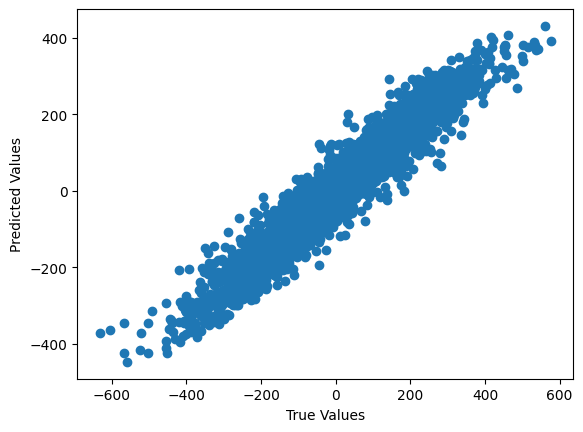

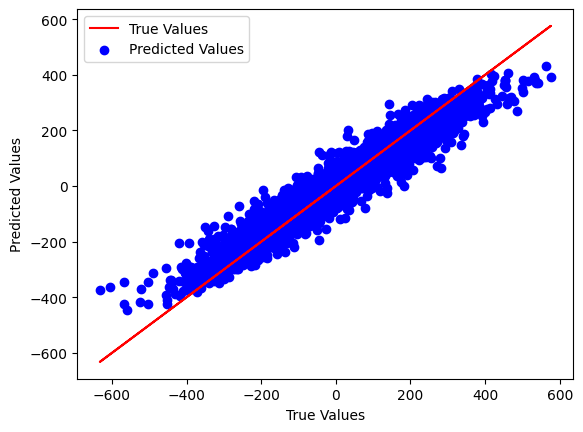

In [ ]:
def plot_scatter(y_test, y_pred):
    plt.scatter(y_test, y_pred)
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.show()

def plot_real_predicted(y_test, y_pred):
    plt.plot(y_test, y_test, color='red', label='True Values')
    plt.scatter(y_test, y_pred, color='blue', label='Predicted Values')
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.legend()
    plt.show()
#plot scatter
plot_scatter(y_test,y_pred)
# plot real and predicted
plot_real_predicted(y_test,y_pred)

# **#3).Create SVR regressor model**

In [ ]:
"""why Support Vector Regression (SVR) regressor model

.robust to outliers."""

#3).create SVR regressor model
import matplotlib.pyplot as plt

from sklearn.svm import SVR
# create a  Regression Object
print("Training Regressor ...")
regr = SVR(gamma ='scale',C = 200.0,epsilon= 0.2)

# train the model using the training sets
X_test = df['Year_1']
y_test = df['Year_1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Train the model using the training sets
regr.fit(X_train, y_train)

#Make predictions using the testing set
y_pred = regr.predict(X_test)
print(y_pred)
#y_pred = y_pred[:X_test.shape[0]]
#print(y_pred.shape)

# Evaluate model and print performance metrics

score = regression_model.score(selected_features, y)
print('R2')
print("R-squared score:", score)
print("Mean squared error:% 0.2f" % mean_squared_error(y_test, y_pred))
print("R2 score:% 0.2f " % r2_score(y_test, y_pred))
print("Mean absolute error:% 0.2f" % mean_absolute_error(y_test, y_pred))


Training Regressor ...
[ -11.1566807  -202.51030207 -184.19671206 ... -288.62505266  156.11474655
 -138.8188781 ]
R-squared score: 0.9157968147702767
Mean squared error: 189.12
R2 score: 0.99 
Mean absolute error: 7.31
R2


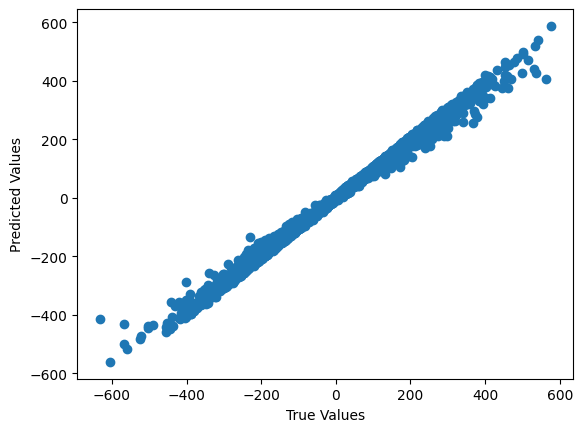

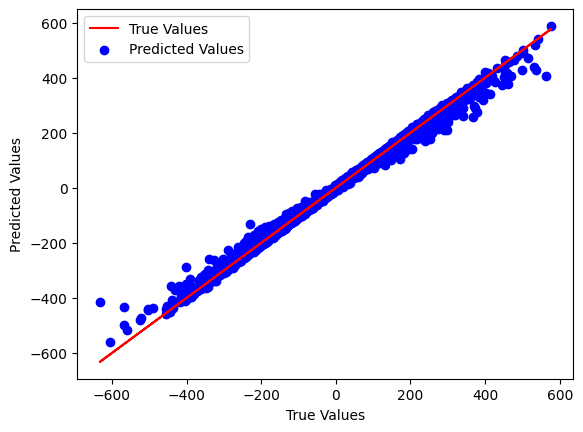

In [ ]:
def plot_scatter(y_test, y_pred):
    plt.scatter(y_test, y_pred)
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.show()

def plot_real_predicted(y_test, y_pred):
    plt.plot(y_test, y_test, color='red', label='True Values')
    plt.scatter(y_test, y_pred, color='blue', label='Predicted Values')
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.legend()
    plt.show()
#plot scatter
plot_scatter(y_test,y_pred)
# plot real and predicted
plot_real_predicted(y_test,y_pred)

In [ ]:
""" How we build our ML model """

#1).Business Problem Statement: State the problem you are trying to solve.
"""ML Problem Definitions: lternatevely,"""

#2. Machine learning  problem Definetion
"""ML Problem Definitions:
  Quantity Predictions
  column to predict = Quantity column
  Quantity of each emission from oilsands (report every substance,no aggregate)"""


#3).Feature Requirements: List all.

# Filter the DataFrame rom Review data
""" Get substances that only belong to 'In-situ oil sands extraction' and " mined oil sands extraction"""

# Print the filtered DataFrame
"""print("substances_in_situ " and  " mined oil sands extraction" )"""


#4. How should you frame your problem then? Frame our problem
"""spliting the "Quantity" column from the main DataFrame and split into respective years and construct features
   . Year_0,Year_1,Year_2,...,Year_8, as features
   .spliting the data for training and testing,we use the "Year1" data as testing set
                     . Year_0 as " target"
                     . Year_1,Year_2,...,Year_8  as training dataset
                     . Use Year_1 to Year_5 recommendable as Year_6,Year_7,Year_8 have ample number of missing data."""

"""Time series forecasting: In time series forecasting, one row in X_test for each  predict, but only one target value for the entire period.
  Regression with multiple outputs: In regression problems with multiple outputs, multiple target values for each data point."""

#7. How are you planning to assess your results? Be minute, detailed and exact.
"""Build model and
Finally,Evaluate the model and print the performance metrics (Regression prediction)
• Mean squared error:
• Mean absolute error:
• R² score: """

"""Generally,
        1.Spliting data "Mined oil sands extraction" and "In-situ oil sands extraction"
        2.Target "Quantity"
        3.spliting again with respect to year reported
        4.prepare clean data for ML
        5.feature selection (p-values and recursive elimination)
        6.Data train cross validation
        7.Build different models for prediction
                a.linear regression
                b.create RandomForestRegressor
                c.create SVR regressor model
        8.Assess the models' performances   """


"""Thank  you"""
